In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-income-dataset/adult.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [3]:
df=pd.read_csv('../input/adult-income-dataset/adult.csv')
print(df.shape)

(48842, 15)


In [4]:
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe().T

count           mean            std      min       25%  \
age              48842.0      38.643585      13.710510     17.0      28.0   
fnlwgt           48842.0  189664.134597  105604.025423  12285.0  117550.5   
educational-num  48842.0      10.078089       2.570973      1.0       9.0   
capital-gain     48842.0    1079.067626    7452.019058      0.0       0.0   
capital-loss     48842.0      87.502314     403.004552      0.0       0.0   
hours-per-week   48842.0      40.422382      12.391444      1.0      40.0   

                      50%       75%        max  
age                  37.0      48.0       90.0  
fnlwgt           178144.5  237642.0  1490400.0  
educational-num      10.0      12.0       16.0  
capital-gain          0.0       0.0    99999.0  
capital-loss          0.0       0.0     4356.0  
hours-per-week       40.0      45.0       99.0

In [7]:
df.replace('?',np.nan , inplace=True)

In [8]:
df.isnull().sum()


age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [9]:
from pandas_profiling import ProfileReport 

profile = ProfileReport( df, title='Pandas profiling report ' , html={'style':{'full_width':True}})

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

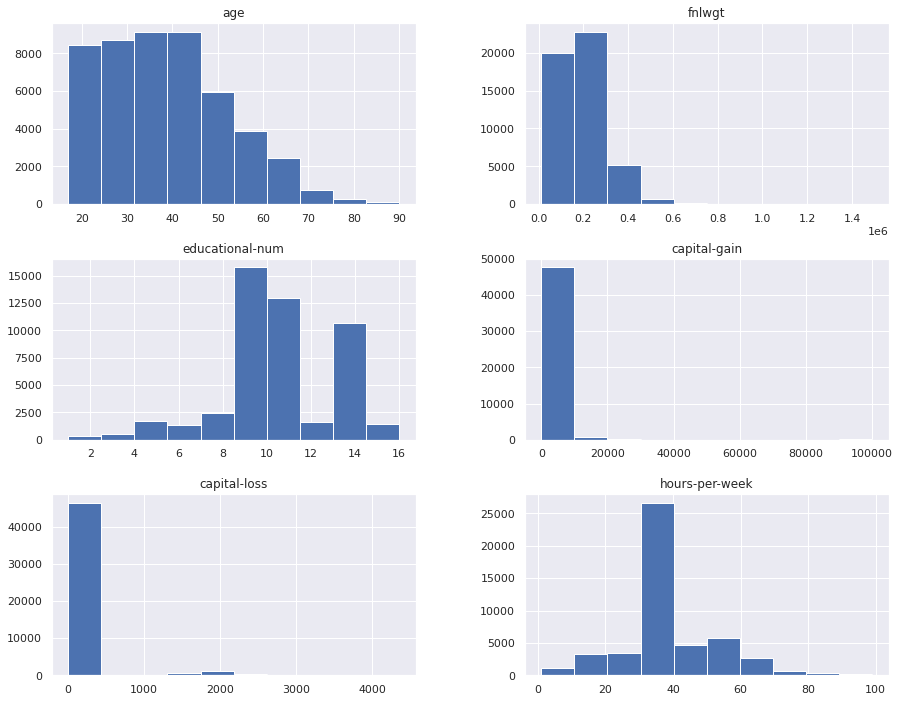

In [10]:
df.hist(figsize=(15,12));

# Handling Categorical Features 

In [11]:
categorical_features=[f for f in df.columns if df.dtypes[f] == 'object']
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

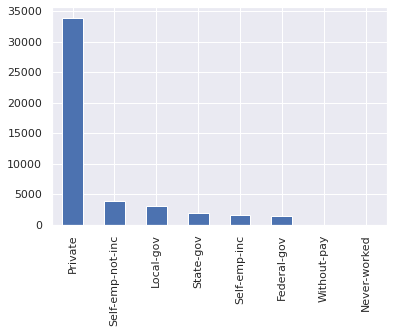

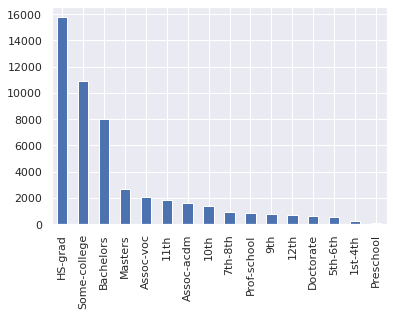

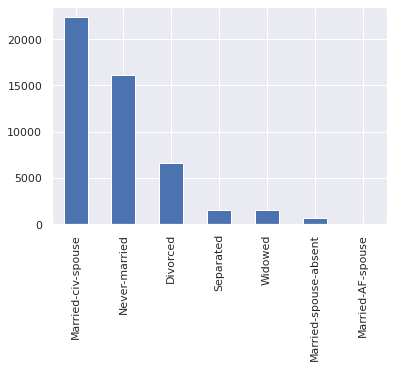

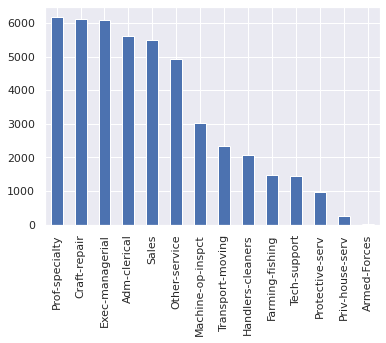

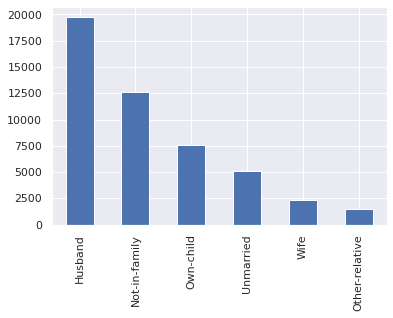

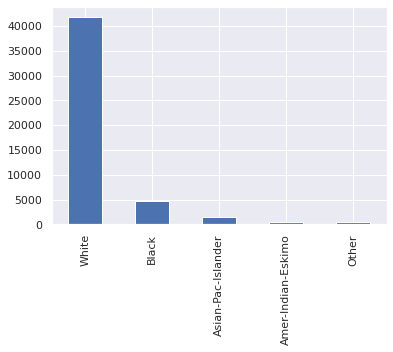

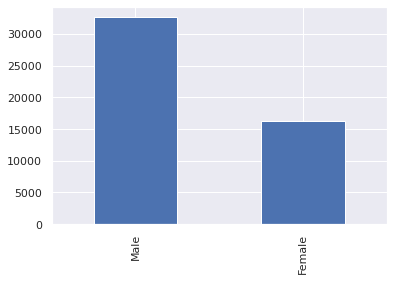

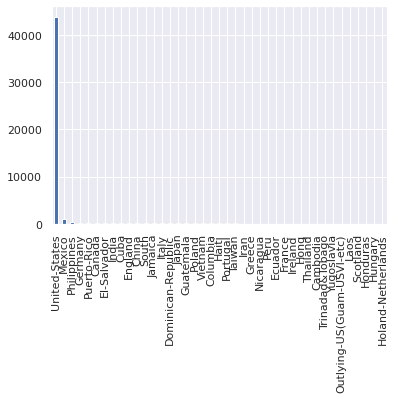

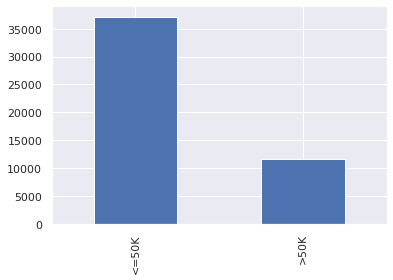

In [12]:
for l in categorical_features:
    df[l].value_counts().plot(kind='bar')
    plt.title=l
    plt.show()

In [13]:
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18        NaN  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [14]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [15]:
def workclass(x):
    if x in ['Self-emp-not-inc','Local-gov','State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked']:
        return 'other'
    else :
        return x
    
    
df['workclass'] = df['workclass'].apply(workclass)

In [16]:
def education(x):
    if x in ['1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th']:
             return 'Primary'
    else:
             return x
df['education'] = df['education'].apply(education)

In [17]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [18]:
def race(x):
    if x in ['Black','Asian-Pac-Islander','Amer-Indian-Eskimo','Other']:
        return 'other'
    else:
        return x
df['race']=df['race'].apply(race)

In [19]:
countries=df['native-country'].value_counts()[2:]


In [20]:
def country(x):
    if x in countries:
        return 'other'
    else:
        return x
df['native-country']=df['native-country'].apply(country)

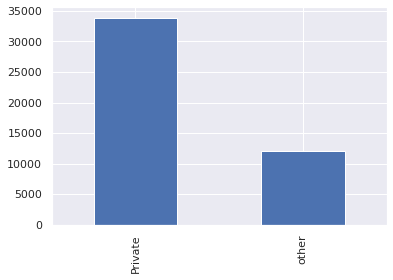

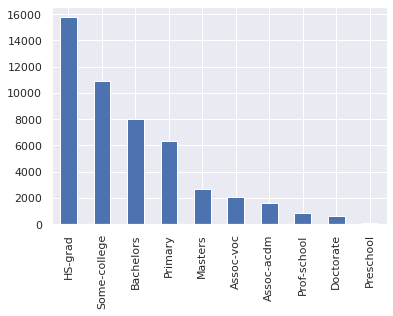

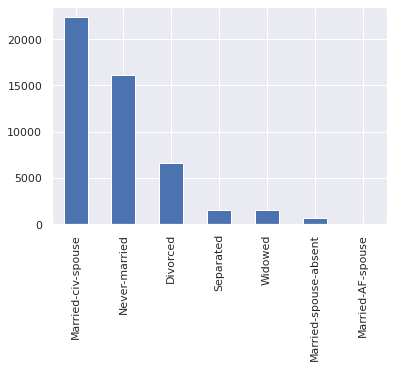

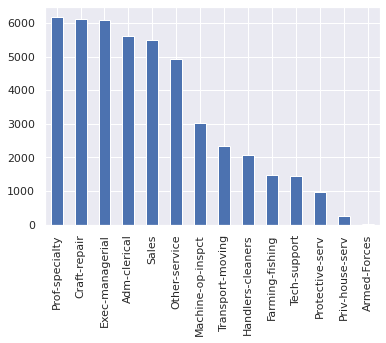

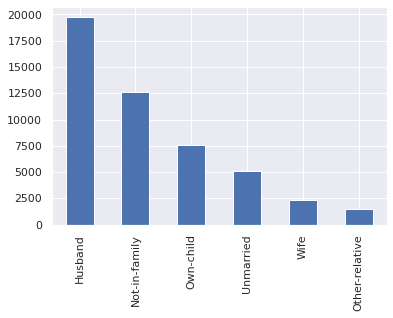

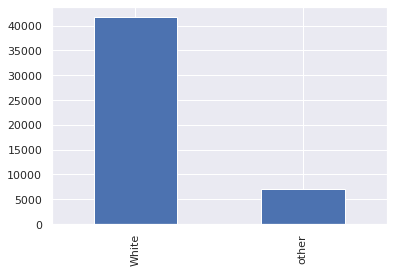

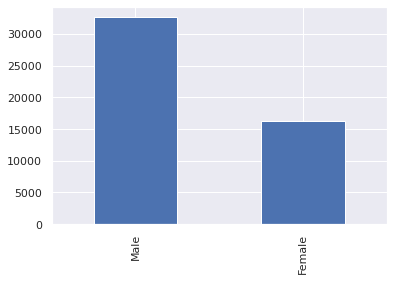

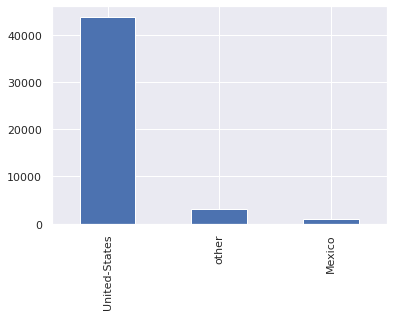

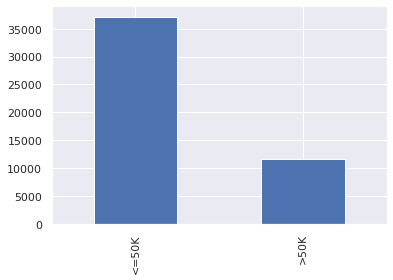

In [21]:
for l in categorical_features:
    df[l].value_counts().plot(kind='bar')
    plt.title=l
    plt.show()

**Handling Numerical Features**

In [22]:
Numreical_features=[f for f in df.columns if df.dtypes[f] != 'object']
Numreical_features

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

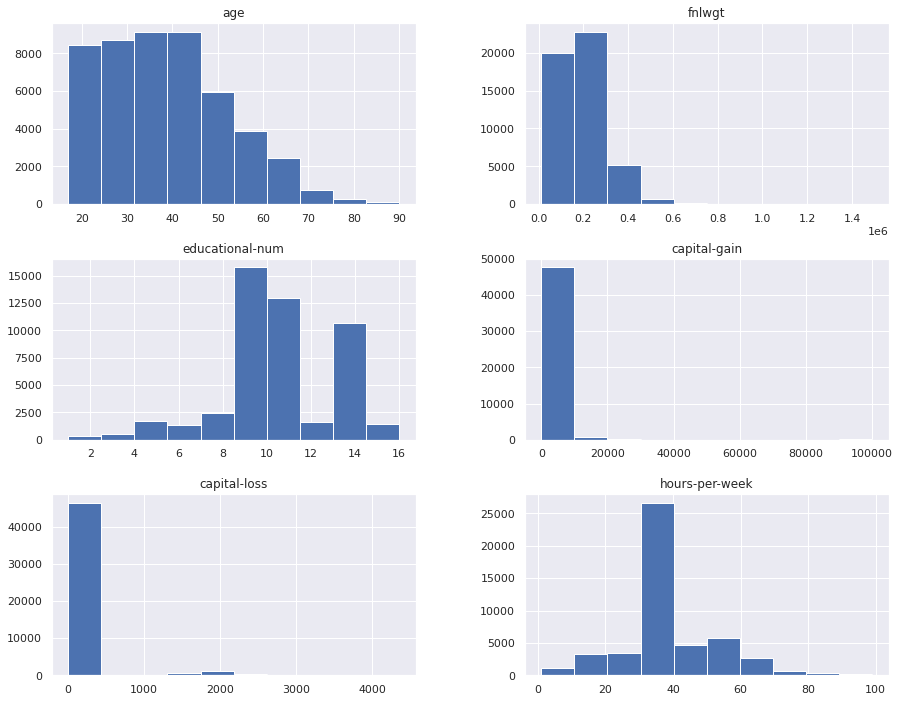

In [23]:
df[Numreical_features].hist(figsize=(15,12));

In [24]:
df=df.drop(['capital-gain',
 'capital-loss'],axis=1)

In [25]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [26]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [27]:
df['workclass'] = df['workclass'].replace({0:'Other'})
df['native-country'] = df['native-country'].replace({0:'Other'})
df['occupation']=df['occupation'].fillna(df['occupation'].mode())

In [28]:
df.loc[df['occupation'].isnull(),'occupation'] = df['occupation'].value_counts()[-1]
df.loc[df['workclass'].isnull(),'workclass'] = 'other'
df.loc[df['native-country'].isnull(),'native-country'] = 'other'

In [29]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [30]:
print(df.shape)

(48842, 13)


In [31]:
df["income"] = df["income"].map({'<=50K':0, '>50K': 1})

In [32]:
X = df.drop('income' , axis = 1).copy()
y = df['income']

In [33]:
categorical_features=['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [34]:
for col in categorical_features:
    X = pd.concat([X , pd.get_dummies(X[col], prefix = col , prefix_sep = ':', drop_first = True)] , axis = 1)
    X.drop(col , axis = 1 , inplace = True)

In [35]:
print(X.shape)

(48842, 43)


In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   48842 non-null  int64
 1   fnlwgt                                48842 non-null  int64
 2   educational-num                       48842 non-null  int64
 3   hours-per-week                        48842 non-null  int64
 4   workclass:other                       48842 non-null  uint8
 5   education:Assoc-voc                   48842 non-null  uint8
 6   education:Bachelors                   48842 non-null  uint8
 7   education:Doctorate                   48842 non-null  uint8
 8   education:HS-grad                     48842 non-null  uint8
 9   education:Masters                     48842 non-null  uint8
 10  education:Preschool                   48842 non-null  uint8
 11  education:Primary                     488

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [38]:
from sklearn.metrics import classification_report
    
def evaluation(model, X_train, y_train, X_test, y_test, is_NN=False):
    y_pred = model.predict(X_test)
    
    if is_NN:
        y_pred = np.array(list(map(int, y_pred > 0.5)))
    
    print("Best model esitmator", model)
    print(classification_report(y_test, y_pred, target_names = ['Under 50k', 'Over 50k']))
    
    if not is_NN:
        print('Training Set Accuracy Score: {:.2f}'.format(model.score(X_train, y_train)))
        print('Testing Set Accuracy Score: {:.2f}'.format(model.score(X_test, y_test)))
        
    return y_pred

In [39]:
from sklearn.metrics import confusion_matrix

def confusion(y_true, y_pred):
    
    confusion_mat = confusion_matrix(y_true, y_pred)
    confusion_df = pd.DataFrame(confusion_mat)
    plt.figure(figsize=(8,8))
    sns.heatmap(confusion_df, annot=True)

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Best model esitmator RandomForestClassifier()
              precision    recall  f1-score   support

   Under 50k       0.86      0.91      0.88      9307
    Over 50k       0.64      0.55      0.59      2904

    accuracy                           0.82     12211
   macro avg       0.75      0.73      0.74     12211
weighted avg       0.81      0.82      0.81     12211

Training Set Accuracy Score: 1.00
Testing Set Accuracy Score: 0.82


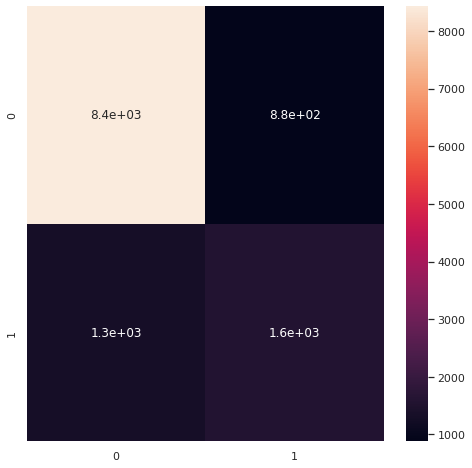

In [41]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score , plot_confusion_matrix
classifier = RandomForestClassifier()
classifier.fit(X_train , y_train)

y_pred = evaluation(classifier, X_train, y_train, X_test, y_test, is_NN=False)
confusion(y_test, y_pred)

In [42]:
from sklearn.ensemble import AdaBoostClassifier

def ada_boost(X_train, y_train):    
    clf = AdaBoostClassifier()
    
    grid_values = {'n_estimators': [50, 70,100]}
    
    grid_clf = GridSearchCV(clf, param_grid = grid_values, scoring ='accuracy', cv=5)
    grid_clf.fit(X_train, y_train)
    
    
    return grid_clf.best_estimator_

Best model esitmator AdaBoostClassifier(n_estimators=100)
              precision    recall  f1-score   support

   Under 50k       0.87      0.92      0.89      9307
    Over 50k       0.69      0.56      0.62      2904

    accuracy                           0.83     12211
   macro avg       0.78      0.74      0.76     12211
weighted avg       0.83      0.83      0.83     12211

Training Set Accuracy Score: 0.84
Testing Set Accuracy Score: 0.83


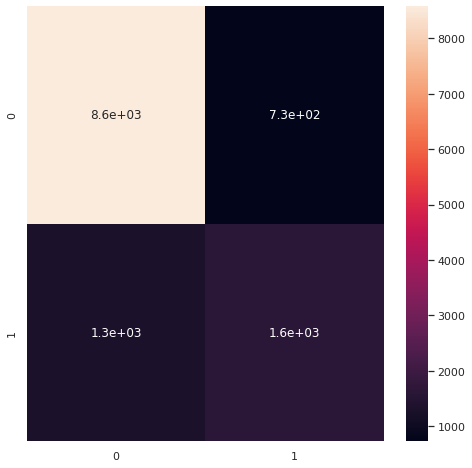

In [43]:
from sklearn.model_selection import GridSearchCV
ada_boost_clr = ada_boost(X_train, y_train)
y_pred = evaluation(ada_boost_clr, X_train, y_train, X_test, y_test, is_NN=False)
confusion(y_test, y_pred)

Best model esitmator DecisionTreeClassifier(max_depth=5)
              precision    recall  f1-score   support

   Under 50k       0.84      0.95      0.89      9307
    Over 50k       0.73      0.41      0.53      2904

    accuracy                           0.82     12211
   macro avg       0.78      0.68      0.71     12211
weighted avg       0.81      0.82      0.80     12211

Training Set Accuracy Score: 0.83
Testing Set Accuracy Score: 0.82


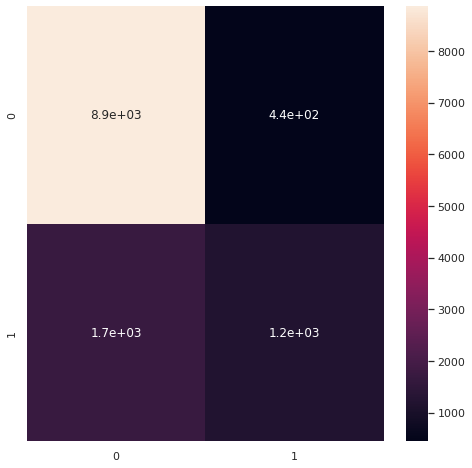

In [44]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth = 5)
DT.fit(X_train,y_train)
y_pred = evaluation(DT, X_train, y_train, X_test, y_test, is_NN=False)
confusion(y_test, y_pred)